/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


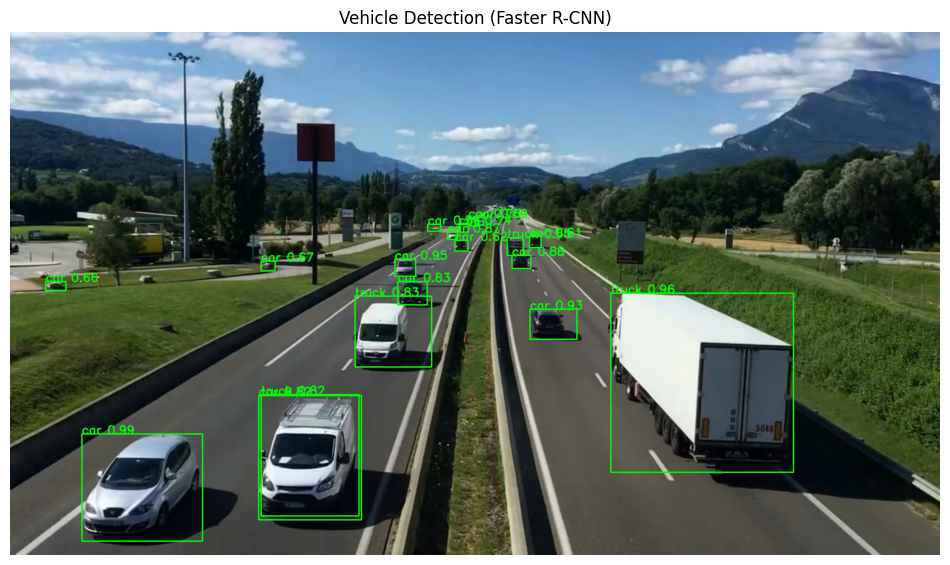

In [1]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load pretrained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(weights=True)
model.eval()

# Load image
img_path = "/Users/morrisonosiezagha/Downloads/sample_image.jpg"
image = Image.open(img_path).convert("RGB")
image_tensor = F.to_tensor(image)

# Run inference
with torch.no_grad():
    prediction = model([image_tensor])[0]

# Get COCO class names
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter',
    'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra',
    'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
    'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet',
    'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
    'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
    'hair drier', 'toothbrush'
]

# Draw boxes
image_np = np.array(image)
for i in range(len(prediction["boxes"])):
    score = prediction["scores"][i].item()
    label = COCO_INSTANCE_CATEGORY_NAMES[prediction["labels"][i]]
    if score > 0.5 and label in ["car", "bus", "truck"]:
        box = prediction["boxes"][i].numpy().astype(int)
        cv2.rectangle(image_np, tuple(box[:2]), tuple(box[2:]), (0, 255, 0), 2)
        cv2.putText(image_np, f"{label} {score:.2f}", tuple(box[:2]), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Display
plt.figure(figsize=(12, 8))
plt.imshow(image_np)
plt.axis("off")
plt.title("Vehicle Detection (Faster R-CNN)")
plt.show()


In [2]:
cap = cv2.VideoCapture("/Users/morrisonosiezagha/Downloads/sample_video.mp4")
model.eval()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    img = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    img_tensor = F.to_tensor(img)

    with torch.no_grad():
        preds = model([img_tensor])[0]

    for i in range(len(preds["boxes"])):
        score = preds["scores"][i].item()
        label = COCO_INSTANCE_CATEGORY_NAMES[preds["labels"][i]]
        if score > 0.5 and label in ["car", "bus", "truck"]:
            box = preds["boxes"][i].numpy().astype(int)
            cv2.rectangle(frame, tuple(box[:2]), tuple(box[2:]), (0, 255, 0), 2)
            cv2.putText(frame, f"{label} {score:.2f}", tuple(box[:2]), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    cv2.imshow("Vehicle Detection", frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


2025-04-10 23:58:51.387 python[20908:1199743] +[IMKClient subclass]: chose IMKClient_Modern
2025-04-10 23:58:51.387 python[20908:1199743] +[IMKInputSession subclass]: chose IMKInputSession_Modern


KeyboardInterrupt: 